In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#DESKRIPSI LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#MEMANGGIL DATASET

In [6]:
df= pd.read_csv('/content/drive/MyDrive/ml1/merc.csv')

#DESKRIPSI DATASET

In [7]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


<Axes: >

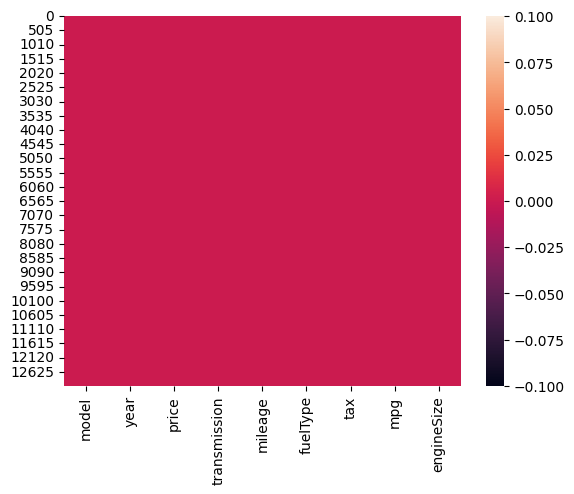

In [17]:
sns.heatmap(df.isnull())

In [12]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


#VISUALISASI DATA

<ipython-input-13-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

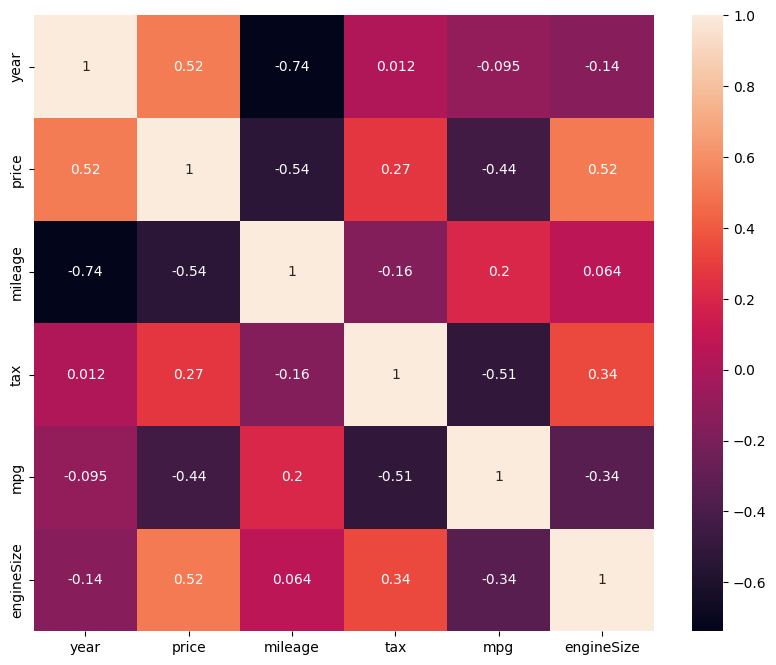

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

#JUMLAH

In [14]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '230'),
  Text(1, 0, '200'),
  Text(2, 0, '220'),
  Text(3, 0, '180'),
  Text(4, 0, ' R Class'),
  Text(5, 0, ' CLC Class'),
  Text(6, 0, ' CLK'),
  Text(7, 0, ' G Class'),
  Text(8, 0, ' GLB Class'),
  Text(9, 0, ' GLS Class'),
  Text(10, 0, ' M Class'),
  Text(11, 0, ' X-CLASS'),
  Text(12, 0, ' CLA Class'),
  Text(13, 0, ' SLK'),
  Text(14, 0, ' GL Class'),
  Text(15, 0, ' S Class'),
  Text(16, 0, ' V Class'),
  Text(17, 0, ' CLS Class'),
  Text(18, 0, ' SL CLASS'),
  Text(19, 0, ' GLE Class'),
  Text(20, 0, ' CL Class'),
  Text(21, 0, ' B Class'),
  Text(22, 0, ' GLA Class'),
  Text(23, 0, ' GLC Class'),
  Text(24, 0, ' E Class'),
  Text(25, 0, ' A Class'),
  Text(26, 0, ' C Class')])

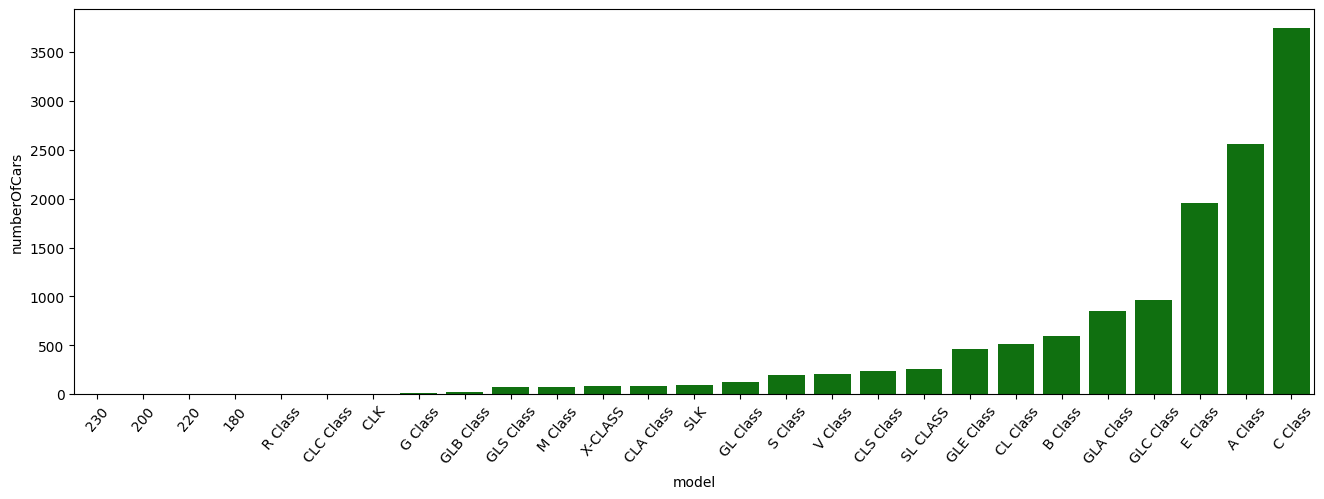

In [15]:
fig = plt.figure(figsize=(16,5))
sns.barplot(x=models['model'],y=models['numberOfCars'], color="green")
plt.xticks(rotation=50)

<Axes: >

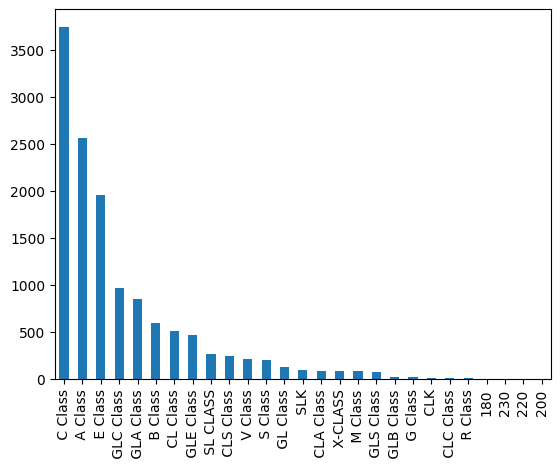

In [16]:
df['model'].value_counts().plot(kind='bar')

#Ukuran Mesin

In [19]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

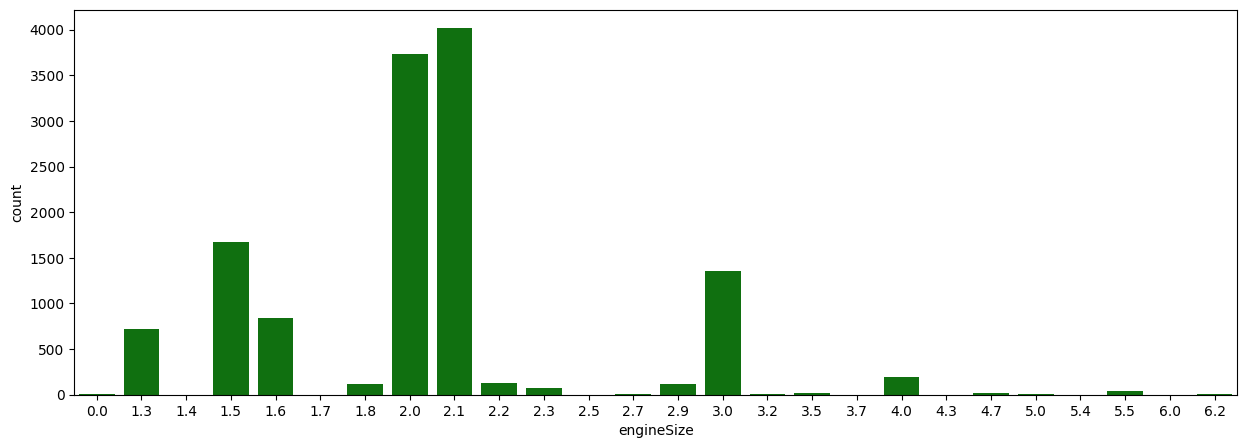

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'],y=engine['count'], color='green')

#DISTRIBUSI MILEAGE

<ipython-input-22-8a407d5b8387>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

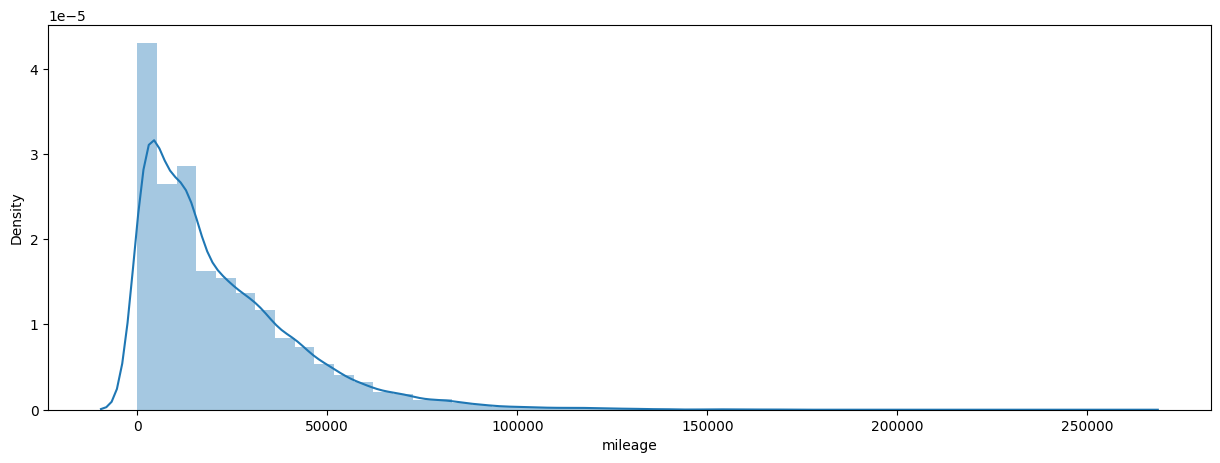

In [22]:
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

#DISTRIBUSI HARGA

<ipython-input-23-7a32f1d4aa34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

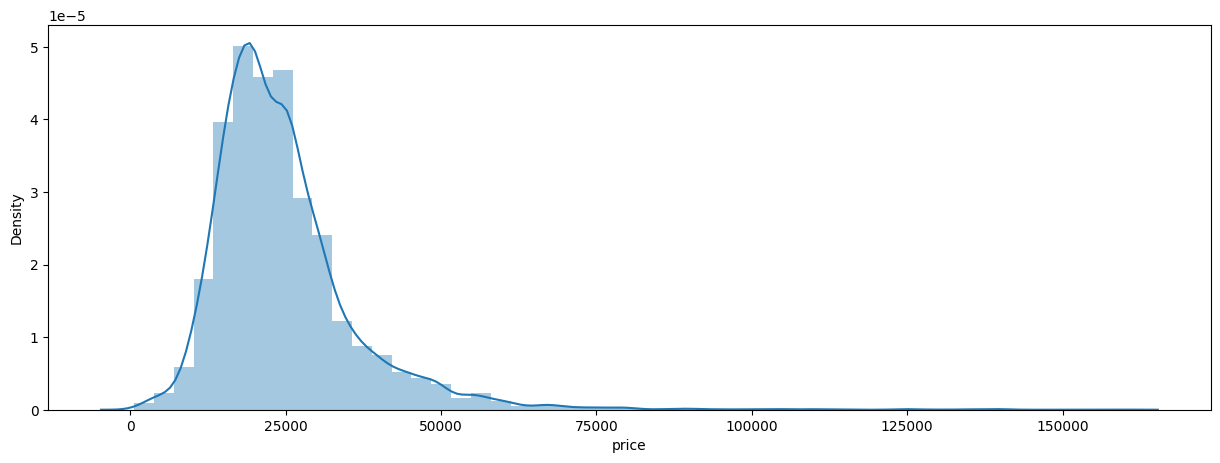

In [23]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

#SELEKSI FITUR

In [26]:
attribute = ['year','mileage','tax','mpg','engineSize']
x = df[attribute]
y = df['price']
x.shape, y.shape

((13119, 5), (13119,))

#SPILIT DATA TRAINING & DATA TESTING

In [27]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(3280,)

#MODEL REGRESI

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [29]:
score = lr.score(X_test, y_test)
print('Akurasi Regresi Linear = ', score)

Akurasi Regresi Linear =  0.689668140479531


#INPUTAN

In [30]:
input_data = np.array([[2019,5000,145,30.2,2]])
prediction = lr.predict(input_data)

print('Estimasi Harga Mobil',prediction)

Estimasi Harga Mobil [33650.20023991]


#SAVE MODEL

In [32]:
import pickle

filename = 'estimasi_harga_mobil_merc.sav'
pickle.dump(lr,open(filename,'wb'))